In [1]:
import matplotlib.pyplot as plt
import torch

import algorithm
from childnet import ChildNetwork
from cifar10_training import Cifar10Trainer

outer_iterations = 100
controller_iterations = 250
child_iterations = 400
hidden_size = 100
num_layer_types = 4
num_hidden_layers = 4
num_filters = [8, 16, 32]
num_classes = 10
batch_size = 128
##
num_of_steps_for_full_training = 17550
max_num_of_best_samples = 3
val_accuracies_for_plotting = torch.zeros(len(num_filters), max_num_of_best_samples)

# check val accuracy for different number of hidden layers
start_num_hidden_layer = 2
n = 0
for i in num_filters:
    n += 1
    print("Find best samples for {} channels per layer".format(i))
    best_samples = algorithm.run(outer_iterations=outer_iterations, controller_iterations=controller_iterations,
                                 child_iterations=child_iterations, hidden_size=hidden_size,
                                 num_layer_types=num_layer_types,
                                 num_layers=num_hidden_layers, num_filters=i, num_classes=num_classes,
                                 batch_size=batch_size,
                                 max_num_of_best_samples=max_num_of_best_samples)
    z = 0
    for architecture in list(best_samples.values()):
        z += 1
        print('training best architecture number {} till convergence'.format(z))
        (layers_types, skip_connections) = architecture
        child_net = ChildNetwork(layers_types, skip_connections, load_previous_network_weights=False,
                                 num_hidden_layers=num_hidden_layers,
                                 num_filters=i, num_classes=num_classes)
        cifar10_trainer = Cifar10Trainer(batch_size=batch_size)
        print('layer types', layers_types)
        print('skip connection', skip_connections)
        val_accuracy, _ = cifar10_trainer.train(child_net, num_of_steps=num_of_steps_for_full_training,
                                                saving_weights=False)
        print('validation accuracy of this architecture is ', val_accuracy)
        val_accuracies_for_plotting[n - 1, z - 1] = val_accuracy
        print('#########')
        print('#########')
    print('############################')
    print('############################')



Find best samples for 8 channels per layer
what is the device? cpu or gpu ?  cuda
Files already downloaded and verified
Files already downloaded and verified
ITERATION NUMBER 1
Controller is sampling architecture...
tensor([[[0.2502, 0.2522, 0.2563, 0.2413]],

        [[0.2511, 0.2516, 0.2553, 0.2419]],

        [[0.2512, 0.2524, 0.2547, 0.2418]],

        [[0.2518, 0.2511, 0.2551, 0.2421]],

        [[0.2492, 0.2519, 0.2556, 0.2432]],

        [[0.2503, 0.2506, 0.2573, 0.2418]],

        [[0.2527, 0.2513, 0.2532, 0.2428]],

        [[0.2498, 0.2515, 0.2555, 0.2432]]], grad_fn=<ExpBackward>)
tensor([[[0., 0., 0., 1.]],

        [[0., 0., 0., 0.]],

        [[0., 1., 0., 0.]],

        [[0., 0., 0., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 0., 0.]],

        [[1., 0., 0., 0.]],

        [[0., 0., 0., 0.]]])
Creating new child network...
Training child network...
The training time for 400 steps is: 12.04 seconds
The validation time on whole validation set is 0.63 seconds
The

Text(0, 0.5, 'validation accuracy on chosen architecture')

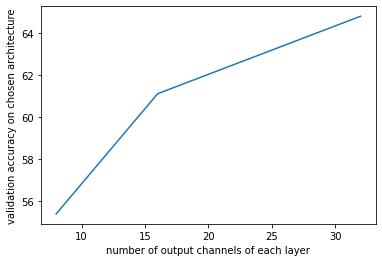

In [2]:
y, _ = torch.max(val_accuracies_for_plotting, 1)
plt.plot(num_filters, y)
plt.xlabel('number of output channels of each layer')
plt.ylabel('validation accuracy on chosen architecture')


In [3]:
print(y)

tensor([55.3800, 61.1200, 64.8200])
